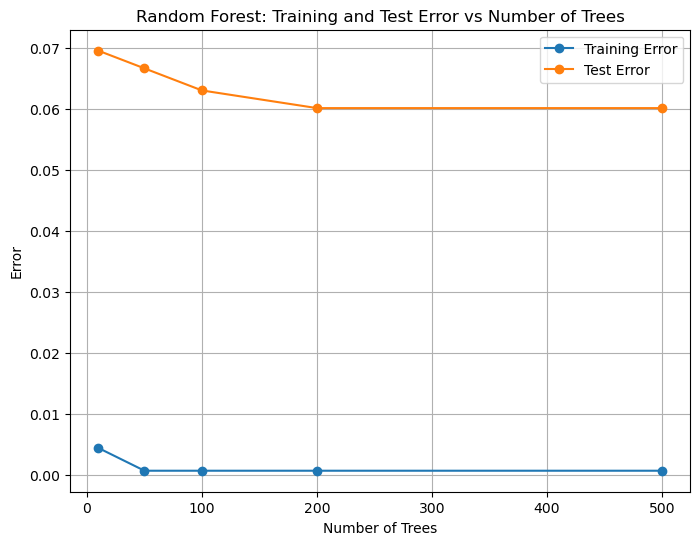

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.utils import check_random_state
from sklearn.preprocessing import MinMaxScaler

file_path = 'data.csv'  # Replace with your file path
df = pd.read_csv(file_path)


# Split features and labels
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# -----------------------------------
# Experiment 1: Vary Forest Size (n_estimators)
# -----------------------------------
n_trees = [10, 50, 100, 200, 500]
train_errors_trees = []
test_errors_trees = []

for n in n_trees:
    rf = RandomForestClassifier(n_estimators=n, max_features=int(np.sqrt(X_train.shape[1])), random_state=42)
    rf.fit(X_train, y_train)
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    train_errors_trees.append(1 - accuracy_score(y_train, y_train_pred))
    test_errors_trees.append(1 - accuracy_score(y_test, y_test_pred))

# Plot training and test errors vs number of trees
plt.figure(figsize=(8, 6))
plt.plot(n_trees, train_errors_trees, label="Training Error", marker='o')
plt.plot(n_trees, test_errors_trees, label="Test Error", marker='o')
plt.title("Random Forest: Training and Test Error vs Number of Trees")
plt.xlabel("Number of Trees")
plt.ylabel("Error")
plt.legend()
plt.grid()
plt.show()



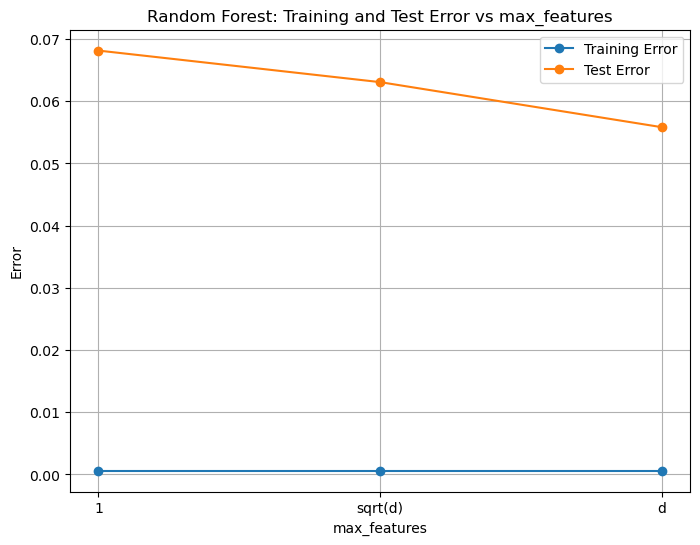

In [11]:
# -----------------------------------
# Experiment 2: Vary max_features
# -----------------------------------
max_features = [1, int(np.sqrt(X_train.shape[1])), X_train.shape[1]]  # 1, sqrt(d), d
train_errors_features = []
test_errors_features = []

for mf in max_features:
    rf = RandomForestClassifier(n_estimators=100, max_features=mf, random_state=42)
    rf.fit(X_train, y_train)
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    train_errors_features.append(1 - accuracy_score(y_train, y_train_pred))
    test_errors_features.append(1 - accuracy_score(y_test, y_test_pred))

# Plot training and test errors vs max_features
plt.figure(figsize=(8, 6))
plt.plot(["1", "sqrt(d)", "d"], train_errors_features, label="Training Error", marker='o')
plt.plot(["1", "sqrt(d)", "d"], test_errors_features, label="Test Error", marker='o')
plt.title("Random Forest: Training and Test Error vs max_features")
plt.xlabel("max_features")
plt.ylabel("Error")
plt.legend()
plt.grid()
plt.show()


In [16]:

# Experiment 3: Unsampled Indices (Starter Code Integration)
# -----------------------------------
rf = RandomForestClassifier(n_estimators=10, random_state=42)
rf.fit(X_train, y_train)

n_samples = X_train.shape[0]
n_samples_bootstrap = n_samples
unsampled_indices_for_all_trees = []

for estimator in rf.estimators_:
    random_instance = check_random_state(estimator.random_state)
    sample_indices = random_instance.randint(0, n_samples, n_samples_bootstrap)
    sample_counts = np.bincount(sample_indices, minlength=n_samples)
    unsampled_mask = sample_counts == 0
    indices_range = np.arange(n_samples)
    unsampled_indices = indices_range[unsampled_mask]
    unsampled_indices_for_all_trees.append(unsampled_indices)

# Print unsampled indices
print("Unsampled Indices for All Trees:", unsampled_indices_for_all_trees)

Unsampled Indices for All Trees: [array([   2,    6,   15, ..., 3215, 3218, 3219]), array([   0,    8,   11, ..., 3217, 3218, 3219]), array([   4,    6,    7, ..., 3214, 3217, 3219]), array([   1,    4,    8, ..., 3214, 3216, 3217]), array([   2,    4,    6, ..., 3211, 3214, 3215]), array([   0,    8,   12, ..., 3211, 3212, 3215]), array([   0,    1,    2, ..., 3212, 3218, 3219]), array([   0,    1,    3, ..., 3214, 3215, 3219]), array([   0,    2,    5, ..., 3213, 3214, 3218]), array([   3,    8,   14, ..., 3214, 3217, 3218])]


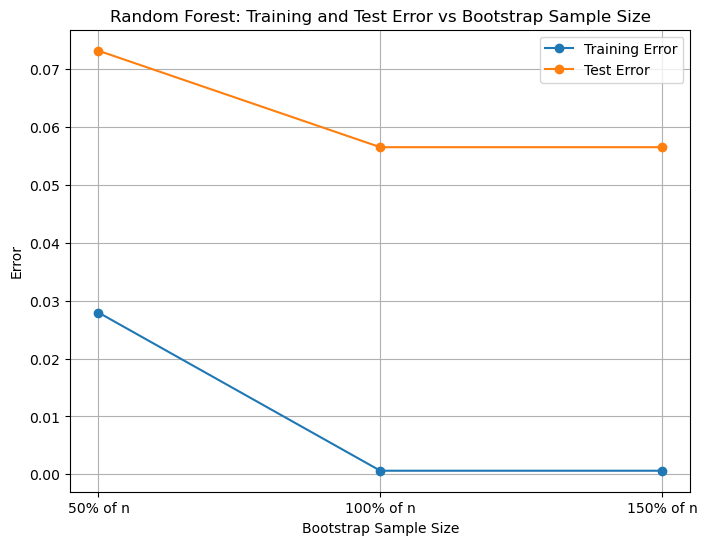

In [21]:
# Experiment with different sample sizes (n')
sample_sizes = [int(0.5 * X_train.shape[0]), X_train.shape[0], int(1.5 * X_train.shape[0])]  # 50%, 100%, 150% of training size
train_errors_sample = []
test_errors_sample = []

for n_samples_bootstrap in sample_sizes:
    rf = RandomForestClassifier(n_estimators=100, random_state=42, bootstrap=False)
    rf.fit(X_train[:n_samples_bootstrap], y_train[:n_samples_bootstrap])
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    train_errors_sample.append(1 - accuracy_score(y_train, y_train_pred))
    test_errors_sample.append(1 - accuracy_score(y_test, y_test_pred))

# Plot training and test errors for different sample sizes
plt.figure(figsize=(8, 6))
plt.plot(["50% of n", "100% of n", "150% of n"], train_errors_sample, label="Training Error", marker='o')
plt.plot(["50% of n", "100% of n", "150% of n"], test_errors_sample, label="Test Error", marker='o')
plt.title("Random Forest: Training and Test Error vs Bootstrap Sample Size")
plt.xlabel("Bootstrap Sample Size")
plt.ylabel("Error")
plt.legend()
plt.grid()
plt.show()


In [1]:
print(X_train.shape[0])

NameError: name 'X_train' is not defined